# ShopAssist AI

## Part 1: Introduction

#### **What you have learnt till now**

So far you have learnt how to make LLM API calls in Python. In particular, you worked with OpenAI's GPT 3.5 models and the `Chat Completion API` to build a simple AI tutor.

<br>

Next, you went over some principles, techniques, and tactics for prompt engineering.
The two main principles of writing a good prompt:
1.  Providing clear instructions,
2.  Enhancing LLM reasoning capabilities.

Under providing clear instructions, you learnt how to structure the body of a prompt through 5 components - **Task, Role, Context, Guidelines and Output Format**.

You also understood that providing a very clear syntax and conditioning on good performance can get you closer to the desired output.

<br>

Next, under enhancing LLM reasoning capabilities, you learnt two specific techniques -
(i) Chain-of-Thought prompting,
(ii) Few-Shot prompting.

Under chain-of-thought prompting, you essentially enable the LLM to work through the solution step-by-step and in few-shot prompting, you provide relevant examples of how you want the outputs to look like. So now you could structure your prompts into proper components and provide clear chain-of-thought instructions along with relevant examples of ideal inputs and outputs.

You also learnt some advanced prompting techniques like self-consistency and ReAct prompting. Self-consistency is basically the technique where you ensemble multiple attempts and select the most consistent output out of them. And in ReAct prompting, you enable the LLM to reason out a scenario and act based on some examples.

<br>

Finally, you looked at some examples of how you can design LLM-based systems. Apart from prompting techniques, you understood that designing a LLM-based system also requires a safe design, i.e., the capabilities to detect and respond to unsafe user queries and prompt injections. You looked at the moderation API offered by OpenAI that can help you design such safer systems.

With all of these learnings, let’s now get started on designing our first LLM application - ShopAssist AI.


#### Project Background

In today's digital age, online shopping has become the go-to option for many consumers. However, the overwhelming number of choices and the lack of personalized assistance can make the shopping experience daunting. To address this, we have developed **ShopAssist AI, a chatbot that combines the power of large language models and rule-based functions to ensure accurate and reliable information delivery**.


#### Problem Statement

*Given a dataset containing information about laptops (product names, specifications, descriptions, etc.), build a chatbot that parses the dataset and provides accurate laptop recommendations based on user requirements*.


You can load the data and see it here.

In [ ]:
# Install OpenAI library
!pip install -U -q openai tenacity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/GenAI Revamp - 2024/GenAI for DS')
!ls

You can download the data from [here](https://cdn.upgrad.com/uploads/production/c85f3fdd-b29f-4c47-9e87-99bbda0fd233/laptop_data.csv) or uncomment the code below to download the file.

In [ ]:
# !wget https://cdn.upgrad.com/uploads/production/c85f3fdd-b29f-4c47-9e87-99bbda0fd233/laptop_data.csv -O laptop_data.csv

In [ ]:
# Import the libraries
import pandas as pd
from IPython.display import display, HTML
# Set the display width to control the output width
pd.set_option('display.width', 100)
# Read the dataset and read the Laptop Dataset
df = pd.read_csv('laptop_data.csv')
df

#### Approach:

1. **Conversation and Information Gathering**: The chatbot will utilize language models to understand and generate natural responses. Through a conversational flow, it will ask relevant questions to gather information about the user's requirements.
2. **Information Extraction**: Once the essential information is collected, rule-based functions come into play, extracting top 3 laptops that best matches the user's needs.
3. **Personalized Recommendation**: Leveraging this extracted information, the chatbot engages in further dialogue with the user, efficiently addressing their queries and aiding them in finding the perfect laptop solution.

## Part 2: System Design


#### Dataset

We have a dataset `laptop.csv` where  each row describes the features of a single laptop and also has a small description at the end. The chatbot that we build will leverage LLMs to parse this `Description` column and provide recommendations

Here's the overall flow of conversation for the ShopAssist Chatbot:

The chatbot should ask a series of questions to
- Determine the user's requirments. For simplicity, we have used 6 features to encapsulate the user's needs. The 6 features are as follows:
    - GPU intensity
    - Display quality
    - Portability
    - Multitasking
    - Processing speed
    - Budget

- Confirm if the user's requirements have been correctly captured at the end.

After that the chatbot lists down the top 3 products that are the most relevant, and engages in further conversation to help the user find the best one.


#### Building the Chatbot

Now let's go ahead and understand the system design for the chatbot.

![Chatbot_sys_design.png](https://drive.google.com/uc?id=1j-mw_dNcbxGcelQ0PmkDB0nKOpauU1wX)

`Stage 1`

- Intent Clarity Layer
- Intent Confirmation Layer

`Stage 2`

- Product Mapping Layer
- Product Information Extraction Layer

`Stage 3`

- Product Recommendation Layer

##### Major functions behind the Chatbot

Let's now look at a brief overview of the major functions that form the chatbot. We'll take a deep dive later



- `initialize_conversation()`: This initializes the variable conversation with the system message.
- `get_chat_completions()`: This takes the ongoing conversation as the input and returns the response by the assistant
- `moderation_check()`: This checks if the user's or the assistant's message is inappropriate. If any of these is inappropriate, it ends the conversation.
- `intent_confirmation_layer()`: This function takes the assistant's response and evaluates if the chatbot has captured the user's profile clearly. Specifically, this checks if the following properties for the user has been captured or not GPU intensity, Display quality, Portability, Multitasking, Processing speed, Budget
- `dictionary_present()`: This function checks if the final understanding of user's profile is returned by the chatbot as a python dictionary or not. If there is a dictionary, it extracts the information as a Python dictionary.
- `compare_laptops_with_user()`: This function compares the user's profile with the different laptops and come back with the top 3 recommendations.
- `initialize_conv_reco()`: Initializes the recommendations conversation

In the next sections, we will look at how to write the code for the above functions.

## Part 3: Implementation

## Stage 1

[Stage 1 Flowchart](https://cdn.upgrad.com/uploads/production/ed8cf454-0c7c-4c5d-bc05-23bb3cea6c57/image+3.jpg)

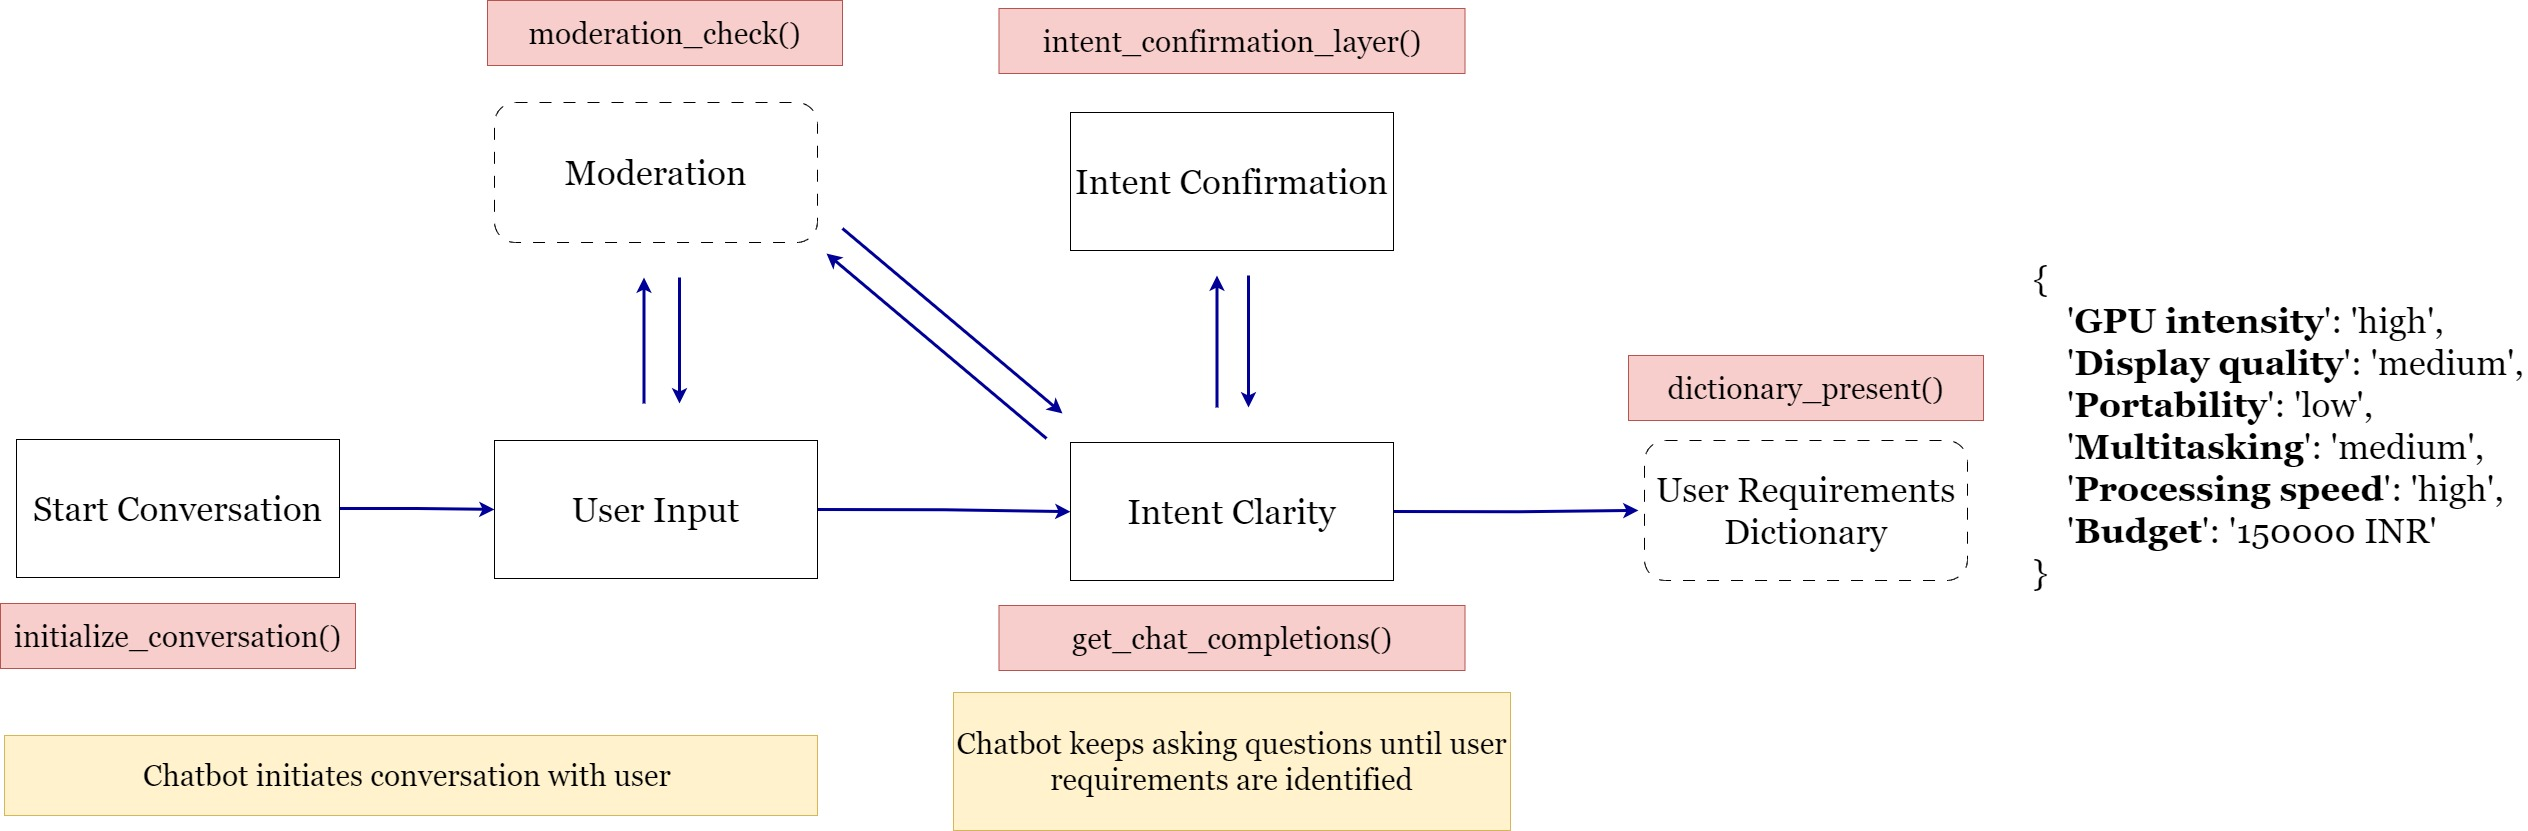

### 3.1 - Import the libraries

Let's start by importing the libraries that we'll require for this project. Following are the ones:
- openai
- pandas
- os, json, ast

Make sure the api key is stored in the text file `OPENAI_API_Key.txt`.

In [ ]:
# Import the libraries
import os, json, ast
import openai
from tenacity import retry, wait_random_exponential, stop_after_attempt

In [ ]:
# # If you're using the default OpenAI API key, uncomment the following lines:
openai.api_key = open("OPENAI_API_Key.txt", "r").read().strip()
os.environ['OPENAI_API_KEY'] = openai.api_key

In [ ]:
# # Recall that messages to the LLM is a list of dicts containing system_message, user_input and assistant_message
# conversation = [{"role": "system", "content": system_message},
#                 {"role": "user", "content": user_input},
#                 {"role": "assistant", "content": assistant_message}]

### 3.2 - Implementing Intent Clarity and Intent Confirmation Layers

Let's start with the first part of the implementation - building the `intent clarity` and `intent confirmation` layers. As mentioned earlier, this layer helps in identifying the user requirements and passing it on to the product matching layer. Here are the functions that we would be using for building these layers:

- `initialize_conversation()`


### `initialize_conversation()`:
This initializes the variable conversation with the system message. Using prompt engineering and chain of thought reasoning, the function will enable the chatbot to keep asking questions until the user requirements have been captured in a dictionary. It also includes Few Shot Prompting(sample conversation between the user and assistant) to align the model about user and assistant responses at each step.



```
def initialize_conversation():
    '''
    Initializes a conversation for an intelligent laptop gadget expert system.

    Returns:
        list: [{"role": "system", "content": system_message}]
        A list containing a dictionary representing the system's initial message.
        
    The function initializes a conversation with the user, providing instructions, examples,
    and a sample conversation to guide the user in interacting with the system. The system's
    initial message includes information about the purpose of the conversation, instructions
    for filling in user profile details, guidelines for asking questions, and a sample
    conversation demonstrating how the interaction with the system progresses.

    The system expects the user to provide information related to their laptop requirements,
    including GPU intensity, display quality, portability, multitasking needs, processing
    speed, and budget. The provided information is used to update a predefined dictionary
    representing the user's profile. The system emphasizes extracting specific details from
    the user's responses to accurately fill in the dictionary values.

    The conversation flow involves three main thoughts:
    - Thought 1: Understanding the user's profile and filling confident values.
    - Thought 2: Filling values for remaining keys based on gathered information.
    - Thought 3: Confirming and verifying updated dictionary values.

    Users are encouraged to engage in a meaningful conversation with the system to ensure
    accurate profile representation and tailored recommendations for the best laptop choice.

    Usage:
        # Initialise the conversation
        conversation = initialize_conversation()
        # Print the conversation
        print(conversation)
    '''
    ```



In [ ]:
def initialize_conversation():
    '''
    Returns a list [{"role": "system", "content": system_message}]
    '''

    system_message = f"""

    """
    conversation = [{"role": "system", "content": system_message}]

    return conversation

In [ ]:
# Let's initialise conversation
system_message = initialize_conversation()
print(system_message[0]["content"])

Let's now look at the next function.
- `get_chat_completions()`: This takes the ongoing conversation as the input and returns the response by the assistant. We'll use the Chat Completions function for performing LLM calls to OpenAI.

### `get_chat_completions()`:

This function perform LLM call using the Chat Completions API to get the LLM response.

```
def get_chat_completions(input):
    """
    Generate chat completions using OpenAI's GPT-3.5-turbo model.

    Parameters:
    - input: list of dictionaries representing chat messages to prompt the model.
    - json_format: boolean, specifies whether the output should be in JSON format (default: False).

    Returns:
    - output: The generated chat completion response. If json_format is True, returns a JSON object.
    """
```

In [ ]:
# Define a Chat Completions API call
def get_chat_completions(input, json_format = False):
    """
    Generate chat completions using OpenAI's GPT-3.5-turbo model.

    Parameters:
    - input: list of dictionaries representing chat messages to prompt the model.
    - json_format: boolean, specifies whether the output should be in JSON format (default: False).

    Returns:
    - output: The generated chat completion response. If json_format is True, returns a JSON object.

### iterate_response() - Helper Function:
We've created a small helper test function to ensure the model's response is consistent.
Uncomment the code blocks and run the function `iterate_response(response)` to check if the response of the `intent_confirmation_layer`is consistent.}

In [ ]:
def iterate_llm_response(funct, debug_response, num=10):
    """
    Calls a specified function repeatedly and prints the results.

    This function is designed to test the consistency of a response from a given function.
    It calls the function multiple times (default is 10) and prints out the iteration count,
    the function's response(s).

    Args:
        funct (function): The function to be tested. This function should accept a single argument
                          and return the response value(s).
        debug_response (dict): The input argument to be passed to 'funct' on each call.
        num (int, optional): The number of times 'funct' will be called. Defaults to 10.

    Returns:
        This function only returns the results to the console.

    Example usage: Test the consistency of responses from 'intent_confirmation_layer' function
    iterate_llm_response(get_chat_completions, messages)
    """


Let's pass the initialized conversation `debug_conversation` and see what is the assistant's response.

In [ ]:
debug_user_input = "Hi, I am Anand. I need a laptop for coding."

In [ ]:
debug_conversation.append({"role": "user", "content": debug_user_input})
# print(debug_conversation[0]["content"]) # System Message
# print(debug_conversation[1]["content"]) # User Input

In [ ]:
# Let's look at the debug_conversation list
display(debug_conversation)

In [ ]:
# Getting the response from the LLM Assistant by passing the conversation to the Chat Completions API
debug_response_assistant = get_chat_completions(debug_conversation)
display(debug_response_assistant)

Let's play around a bit and add the following user's input `debug_user_input` to the conversation `debug_conversation` and see what the assistant responds with.

In [ ]:
# Let's append this to the conversation list
debug_conversation.append(({"role": "system", "content": debug_response_assistant}))
debug_conversation

Typically, whenever the chatbot is interacting with the user, all the conversations should be moderated to identify any inappropriate content. Let's look at the function that can help with it.

### `moderation_check()`:
 This checks if the user's or the assistant's message is inappropriate. If any of these is inappropriate, you can add a break statement to end the conversation.

In [ ]:
# Define a function called moderation_check that takes user_input as a parameter.
def moderation_check(user_input):
    """
    Perform moderation check on user input using the OpenAI API.

    Parameters:
    - user_input (str): The text input to be checked for moderation.

    Returns:
    - str: "Flagged" if the input is flagged by the moderation system,
           "Not Flagged" otherwise.
    """
    # Call the OpenAI API to perform moderation on the user's input.

    # Extract the moderation result from the API response.

    # Check if the input was flagged by the moderation system. If flagged, return "Flagged" else return "Not Flagged"

In [ ]:
moderation_check("I want to kill them.")

Let's test moderation on the `debug_user_input`

In [ ]:
debug_moderation = moderation_check(debug_user_input)
print(debug_moderation)

Let's now test moderation on some other text.

In [ ]:
print(moderation_check("I want to kill Ravan."))
print(moderation_check("I need a laptop"))

So, this moderation api may not be perfect but if you ask this to the ChatGPT or it's API (GPT 3.5), it'll not help you with such requests. Remember, moderation should also be applied on the GPT 3.5's output.

Let's now check moderation on the assistant's response `debug_response_assistant`.

In [ ]:
moderation_check(debug_response_assistant)

As mentioned earlier, you need to understand the user's profile, which essentially means that all the features: GPU intensity, Display quality, Portability, Multitasking, Processing speed, Budget are captured or not. Let's look at the function that helps us verify that.

### `intent_confirmation_layer()`:

This function takes the assistant's response and evaluates if the chatbot has captured the user's profile clearly. Specifically, this checks if the following properties for the user has been captured or not
   - GPU intensity
   - Display quality
   - Portability
   - Multitasking
   - Processing speed
   - Budget



```
def intent_confirmation_layer(response_assistant):
    """
    This function serves as an intent confirmation layer for a laptop recommendation system using OpenAI LLM API.

    Parameters:
    - response_assistant (str): The input text containing user requirements captured through 6 keys:
        'GPU intensity', 'Display quality', 'Portability', 'Multitasking', 'Processing speed', and 'Budget'.

    Returns:
    - str: A one-word string in JSON format indicating if the values for the specified keys are correctly filled.
        - 'Yes' if the values are correctly filled for all keys ('GPU intensity', 'Display quality', 'Portability',
          'Multitasking', 'Processing speed') based on the importance as stated by the user.
        - 'No' otherwise.

    Note:
    - The values for all keys, except 'Budget', should be 'low', 'medium', or 'high' based on their importance as stated by the user.
    - The input text should be structured such that it contains the necessary keys and their corresponding values.
    - The function uses OpenAI's Chat Completion API to evaluate the correctness of the input values.
    """
```



In [ ]:
def intent_confirmation_layer(response_assistant):
    """
    This function takes in a response from an AI assistant and evaluates it based on specific criteria.

    Args:
    - response_assistant (str): The input text containing user requirements captured through 6 keys:
      'GPU intensity', 'Display quality', 'Portability', 'Multitasking', 'Processing speed', and 'Budget'.

    Returns:
    - dict: A JSON-formatted dictionary with keys 'result' and, if applicable, 'reason'.
      - 'result' (str): Either 'Yes' or 'No', indicating if the input meets the criteria.
      - 'reason' (str, optional): If 'result' is 'No', this key provides a reason for the evaluation.

    Key Instructions:
    1. The input should include values for the specified keys.
    2. Allowed values for 'GPU intensity', 'Display quality', 'Portability', 'Multitasking', and 'Processing speed'
       are 'low', 'medium', and 'high'.
    3. 'Budget' should only have a numerical value.
    4. Only a one-word string in JSON format ('Yes' or 'No') should be output at the key 'result'.
    5. If 'result' is 'No', include the reason in the key 'reason'.
    6. Use the AI model 'gpt-3.5-turbo' to process the evaluation.

    Example:
    >>> input_text = "{'GPU intensity': 'high', 'Display quality': 'medium', 'Portability': 'low',
                      'Multitasking': 'medium', 'Processing speed': 'high', 'Budget': 1200}"
    >>> intent_confirmation_layer(input_text)
    {'result': 'Yes'}

    Note: Modify the input text to match the expected format before passing it to this function.
    """


In [ ]:
# Here are some sample input output pairs for better understanding:
# {delimiter}
# input: "{{'GPU intensity': 'low', 'Display quality': 'high', 'Portability': 'low', 'Multitasking': 'high', 'Processing speed': 'low'}}"
# output: No

# input: "{{'GPU intensity': 'low', 'Display quality': 'high', 'Portability': 'low', 'Multitasking': 'high', 'Processing speed': '', 'Budget': '90000'}}"
# output: No

# input: "Here is your user profile 'GPU intensity': 'high','Display quality': 'high','Portability': 'medium','Multitasking': 'low','Processing speed': 'high','Budget': '200000'"
# output: Yes

# input: "Here is your recommendation {{'GPU intensity': 'low', 'Display quality': 'high', 'Portability': 'low', 'Multitasking': 'high', 'Processing speed': 'low', 'Budget': '90000'}}"
# output: Yes

# input: "Here is your recommendation - 'GPU intensity': 'high' - 'Display quality': 'low' - 'Portability': 'low'  - 'Multitasking': 'high' - 'Processing speed': 'high' - 'Budget': '90000' "
# output: Yes

# input: "You can look at this - GPU intensity: high - Display quality: low - Portability: low  - Multitasking: high - Processing speed: high - Budget: 90000"
# output: Yes

# input: "{{GPU intensity: low, Display quality: high, Portability: low, Multitasking:high,Processing speed: Low, Budget: 70000}}"
# output: No

# {delimiter}

Let's apply the function to the assistant's reponse and see if it has captured the user profile.

In [ ]:
debug_response_assistant

In [ ]:
debug_confirmation = intent_confirmation_layer(debug_response_assistant)
display(debug_confirmation)

In [ ]:
# Printing the value for better clarity
print("Result:",debug_confirmation.get('result'),"\t", "Reason:", debug_confirmation.get('reason'))

Now, you can keep adding user and assistant responses to debug_conversation and get to a point where intent_confirmation_layer() gives yes as a response. Let's see if the following response by the assistant passes the intent_confirmation_layer() test.

In [ ]:
#Let's add the above assistant response to the debug_conversation.
debug_conversation.append({"role": "assistant", "content": debug_response_assistant})

In [ ]:
debug_conversation

Let's say that after a series of conversations you get the following response from the assistant.

In [ ]:
# Example 1 - Let's check with the confirmation_layer if all the keys are present
debug_response_assistant_1 = f"""
Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the laptop you are looking for:
{{'GPU intensity':'high',
 'Display quality':'high',
 'Portability':'low',
 'Multitasking':'low',
 'Processing speed':'low',
 'Budget':'50000 INR'}}
"""
#Note that you are using double curly braces

print(debug_response_assistant_1)

Do you think it'll pass the `intent_confirmation_layer()` test?

 Let's try it out.

In [ ]:
response = intent_confirmation_layer(debug_response_assistant_1)
response.get('result') # Extract the result key from the dictionary

In [ ]:
# Example 2 - Let's check confirmation_layer if all the keys are present
debug_response_assistant_2 = f"""
Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the laptop you are looking for:
{{'GPU intensity':'high',
 'Display quality':'high',
 'Portability':'low',
 'Multitasking':'low',
 'Processing speed':'low'}}
"""
#Note that you are using double curly braces

print(debug_response_assistant_2)

In [ ]:
intent_confirmation_layer(debug_response_assistant_2)
# iterate_llm_response(intent_confirmation_layer, debug_response_assistant_2)

In [ ]:
# Example 3 - Let's check confirmation_layer if all the keys are present
debug_response_assistant_3 = f"""
Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the laptop you are looking for:
{{'GPU intensity':'high',
 'Display quality':'high',
 'Portability':'low',
 'Multitasking':'low',
 'Processing speed':'low',
 'Budget':'50000'}}
"""
#Note that you are using double curly braces

print(debug_response_assistant_3)

In [ ]:
intent_confirmation_layer(debug_response_assistant_3)

Let's now look at the working of `dictionary_present()`.

In [ ]:
# Let's check the consistency of the output responses
# iterate_llm_response(intent_confirmation_layer, debug_response_assistant_3)

### `dictionary_present()`:

This function checks if the final understanding of user's profile is returned by the chatbot is a Python dictionary or not. This is important as it'll be used later on for finding the right laptops using dictionary matching.

In [ ]:
def dictionary_present(response):
    """
    Extracts and returns a Python dictionary in JSON format from the given input string if it matches a specific format.
    Args:
    - response (str): A string containing the user input or a Python dictionary in a specific format.

    Returns:
    - dict: The extracted Python dictionary in JSON format if found, otherwise returns None.

    The input string is expected to contain a Python dictionary in the following format:
    {'GPU intensity': 'low/ medium/ high',
    'Display quality': 'low/ medium/ high',
    'Portability': 'low/ medium/ high',
    'Multitasking': 'low/ medium/ high',
    'Processing speed': 'low/ medium/ high',
    'Budget': 'Budget in numerical value'}

    The function extracts the relevant values from the input and returns only the Python dictionary in JSON format. The output must match the format described above.

    Example:
    input = "Here is your user profile \
    'GPU intensity': 'high','Display quality': 'high','Portability': 'medium','Multitasking': 'high','Processing speed': 'high','Budget': '200000 INR'"
    >>> dictionary_present(response)
    '{"GPU intensity": "high","Display quality": "high","Portability": "medium","Multitasking": "high","Processing speed": "high","Budget": "200000"}'

    NOTE: The function internally uses get_chat_completions() to interact with the user in a chat-like manner.
    """

In [ ]:
def dictionary_present(response):
    delimiter = "####"


    prompt = f"""
            """
    messages = [{"role": "system", "content":prompt },
                {"role": "user", "content":f"""Here is the user input: {response}""" }]

    confirmation = get_chat_completions(messages)

    return confirmation

Let's start by passing the `debug_response_assistant`.

In [ ]:
debug_response_assistant_n = """
{'GPU intensity':'high',
 'Display quality':'high',
 'Portability':'low',
 'Multitasking':'low',
 'Processing speed':'low',
 'Budget':'50000'}
"""

In [ ]:
response_dict_n = dictionary_present(debug_response_assistant_n)
display(response_dict_n)

In [ ]:
type(response_dict_n)

What if you pass something like this where it is not in the form of a dictionary? Or some key or some values are missing? Let's see.

In [ ]:
debug_response_assistant_n = f"""Thank you for providing your budget.
Based on your budget of 50,000 INR, I will consider this while recommending suitable laptop options for you.
Here is the final recommendation for your laptop:
- GPU intensity: high
- Display quality: high
- Portability: low
- Multitasking: high
- Processing speed: medium
- Budget: 80,000 INR

Please note that these specifications are based on your requirements for surfing and a decent display within your budget.
Let me know if there's anything else I can assist you with!"""

In [ ]:
response_dict_n = dictionary_present(debug_response_assistant_n)
display(response_dict_n)

In [ ]:
type(response_dict_n)

In [ ]:
# Check for LLM function's consistency
iterate_llm_response(dictionary_present, debug_response_assistant_n)

Let's quickly take a look at the code that we have run until now.

In [ ]:
debug_conversation

In [ ]:
debug_conversation = initialize_conversation()
debug_user_input = "Hi, I am Anand. I need a laptop for coding."
debug_moderation = moderation_check(debug_user_input)
debug_conversation.append({"role": "user", "content": debug_user_input})
debug_response_assistant = get_chat_completions(debug_conversation)
debug_moderation = moderation_check(debug_response_assistant)
debug_conversation.append({"role": "assistant", "content": debug_response_assistant})
debug_confirmation = intent_confirmation_layer(debug_response_assistant)
# After a series of conversation...
response_dict_n = dictionary_present(debug_response_assistant_n)
print(response_dict_n)

So, now that you have the user profile stored in `response_dict_n`. We'll use this to generate recommendations. Before that, we need to create a similar profile for every laptop. Let's see how we do it.

## Stage 2

[Stage 2 Flowchart](https://cdn.upgrad.com/uploads/production/c71aa254-32db-4265-a083-f4a540dac014/Stage+2.jpg)

### 3.3 Implementing the Product Mapping and Information Extraction Layers

In this section, we take in the output of the previous layers, i.e. the user requirements, which is in the format of a Python dictionary.
<br>
Next we will extract the top 3 laptop recommendations based on user's requirements.

This stage consists of the following helper functions that will implement the information extraction and product matching layers.

### `product_map_layer()`:

This function is responsible for extracting key features and criteria from laptop descriptions. Here's a breakdown of how it works:

-  Use a prompt that assign it the role of a Laptop Specifications Classifier, whose objective is to extract key features and classify them based on laptop descriptions.

- Provide step-by-step instructions for extracting laptop features from description.

- Assign specific rules for each feature (e.g., GPU Intensity, Display Quality, Portability, Multitasking, Processing Speed) and associate them with the appropriate classification value (Low, Medium, or High).

- Includes Few Shot Prompting (sample conversation between the user and assistant) to demonstrate the expected result of the feature extraction and classification process.

In [ ]:
def product_map_layer(laptop_description):
    """
    Extracts key features from a laptop description and classifies them based on predefined rules.

    Args:
        laptop_description (str): The description of the laptop to be analyzed.

    Returns:
        dict: A dictionary containing the classified features of the laptop.
            Keys represent different aspects such as GPU intensity, Display quality, Portability,
            Multitasking, and Processing speed, each mapped to a value indicating the classification
            (low, medium, or high) based on the extracted features.
    """

In [ ]:
def product_map_layer(laptop_description):
    delimiter = "#####"

    prompt=f"""

    """

    input = f"""Follow the prompt instructions step-by-step and output the dictionary in JSON format for the following laptop {laptop_description}."""

    messages=[{"role": "system", "content":prompt },{"role": "user","content":input}]

    response = get_chat_completions(messages)

    return response

Let's test this for one sample laptop description.

In [ ]:
laptop_description_1 = f"""
The Dell Inspiron is a versatile laptop that combines powerful performance and affordability.
It features an Intel Core i5 processor clocked at 2.4 GHz, ensuring smooth multitasking and efficient computing.
With 8GB of RAM and an SSD, it offers quick data access and ample storage capacity.
The laptop sports a vibrant 15.6" LCD display with a resolution of 1920x1080, delivering crisp visuals and immersive viewing experience.
Weighing just 2.5 kg, it is highly portable, making it ideal for on-the-go usage.
Additionally, it boasts an Intel UHD GPU for decent graphical performance and a backlit keyboard for enhanced typing convenience.
With a one-year warranty and a battery life of up to 6 hours, the Dell Inspiron is a reliable companion for work or entertainment.
All these features are packed at an affordable price of 35,000, making it an excellent choice for budget-conscious users.
"""

In [ ]:
display(product_map_layer(laptop_description_1))

In [ ]:
# # Data type of the output response
print(type(product_map_layer(laptop_description_1)))

In [ ]:
# # Check for consistency with iterate_response function
iterate_llm_response(product_map_layer, laptop_description_1)

Let's now apply this function to the entire laptop dataset

In [ ]:
##Run this code once to extract product info in the form of a dictionary
laptop_df= pd.read_csv('laptop_data.csv')

## Create a new column "laptop_feature" that contains the dictionary of the product features
laptop_df['laptop_feature'] = laptop_df['Description'].apply(lambda x: product_map_layer(x))

In [ ]:
laptop_df.to_csv("updated_laptop.csv",index=False,header = True)

### `compare_laptops_with_user()`:

This function compares the user's profile with the different laptops and come back with the top  recommendations. It will perform the following steps:
    - It will take the user requirements dictionary as input
    - Filter the laptops based on their price, keeping only the ones within the user's budget.
    - Calculate a score for each laptop based on how well it matches the user's requirements.
    - Sort the laptops based on their scores in descending order.
    - Return the top 3 laptops as a JSON-formatted string.

In [ ]:
def compare_laptops_with_user(user_req_string):
    """
    Compares laptops based on user requirements and returns the top 3 matching laptops in JSON format.

    Parameters:
    - user_req_string (str): A string representing user requirements in JSON format.

    Returns:
    - str: A JSON string containing information about the top 3 matching laptops based on user requirements.
    """

In [ ]:
def compare_laptops_with_user(user_req_string):
    laptop_df = pd.read_csv('updated_laptop.csv')

    user_requirements = user_req_string

    # Extracting user requirements from the input string (assuming it's a dictionary)
    # Create a scoring mechanism for comparing the laptops in the laptop descriptions against the user_req_string containing the user's persona
    # Sorting laptops by score in descending order and selecting the top 3 products

    # top_laptops

Now that you have the `compare_laptops_with_user()` function ready, let's pass the `response_dict_n` to the function to get top 3 recommendation.

In [ ]:
display(response_dict_n, '\n',type(response_dict_n))

In [ ]:
dictionary_present(response_dict_n)

In [ ]:
top_3_laptops = compare_laptops_with_user(response_dict_n)

display(top_3_laptops)

### `product_validation_layer()`:

This function verifies that the laptop recommendations are good enough, has score greater than 2, and matches the user's requirements.

In [ ]:
def recommendation_validation(laptop_recommendation):
    """
    Validate a list of laptop recommendations based on a score threshold.

    Parameters:
    - laptop_recommendation (str): JSON string containing a list of laptop recommendations,
      each with a 'Score' key representing its rating.

    Returns:
    - list: A filtered list of laptop recommendations where each item has a 'Score' greater than 2.
    """

In [ ]:
validated_data = recommendation_validation(top_3_laptops)
print(validated_data)

Now that you the top 3 laptops extracted, let's pass it to the recommendation layer that'll send it to the user and the user can ask questions around it.